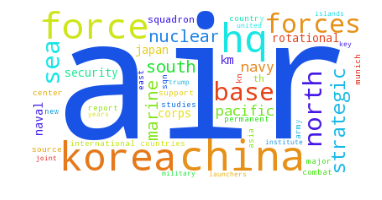

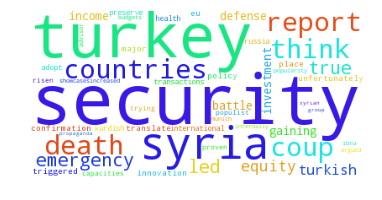

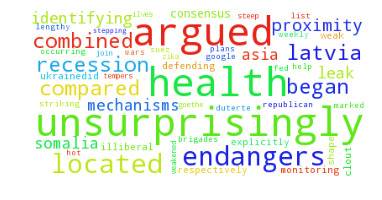

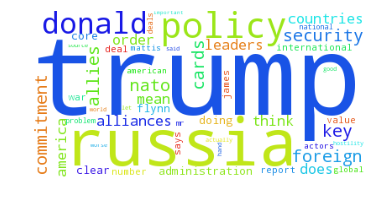

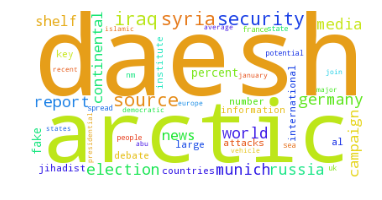

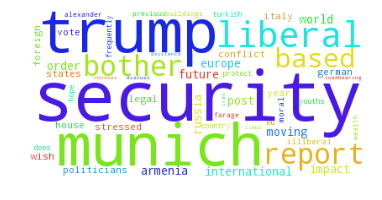

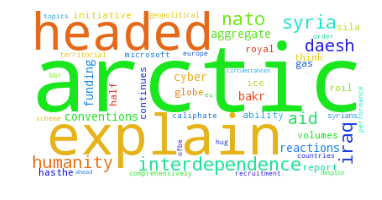

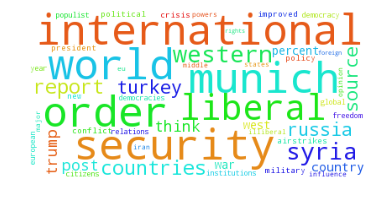

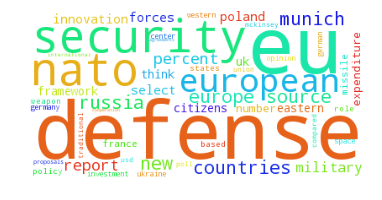

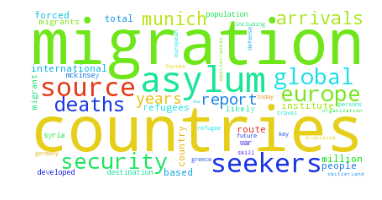

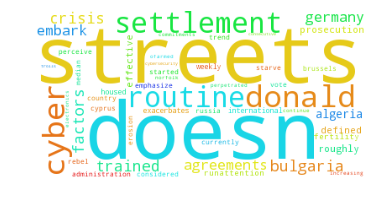

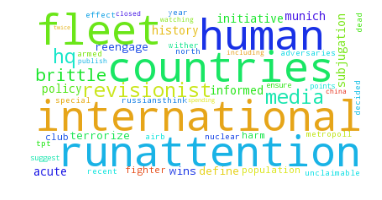

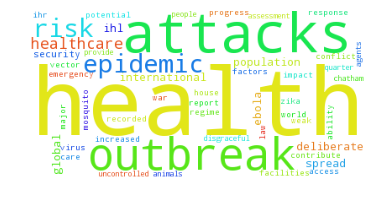

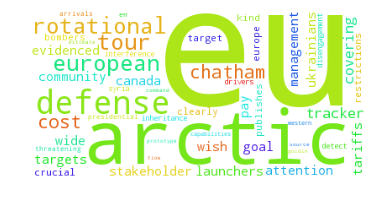

In [1]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
import math
import wordcloud
%matplotlib inline

n_topics = 14
n_top_words = 20

CORPUS_PATH = os.path.join('munichsr')
filenames = sorted([os.path.join(CORPUS_PATH,fn) for fn in 
                    os.listdir(CORPUS_PATH)])


tf_vectorizer = CountVectorizer(input='filename',
                                stop_words='english')
tf = tf_vectorizer.fit_transform(filenames)
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()

for i in range (0,14):
    termsInTopic = lda.components_[i].argsort()[:-50-1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(tf_feature_names[term].encode('utf-8').strip()),math.ceil(lda.components_[i][term]*1000)))
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(termsAndCounts)
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()